### Import Dependencies

In [1]:
!pip install category-encoders

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00


In [2]:
# Read a dataset file form Github link
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip  bank-additional.zip

--2023-06-04 13:21:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K   562KB/s    in 0.8s    

2023-06-04 13:21:02 (562 KB/s) - ‘bank-additional.zip’ saved [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/.

### Data Exploration

In [3]:
bank_market_df = pd.read_csv("./bank-additional/bank-additional-full.csv",sep=";")
print(bank_market_df.shape) # print data shape
print(bank_market_df.columns) # print columns
bank_market_df.head()

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Show the information of dataset and check a type of data
print(bank_market_df.shape)
print(bank_market_df.info())
bank_market_df.head()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Select a numeric and category column name of dataset
numeric_col = bank_market_df.select_dtypes(include=['int64', 'float64']).columns
category_col = bank_market_df.select_dtypes(include=['object']).columns

In [6]:
# Check a sum of NULL value
bank_market_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
for col in category_col:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")    
    print(bank_market_df[col].value_counts(), "\n")
    
print(bank_market_df.nunique(axis=1))

job 
--------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital 
--------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education 
--------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default 
--------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing 
--------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan 
----------------

In [8]:
bank_market_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<ipython-input-9-3a77d45dd2ee>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(bank_market_df.corr(),annot = True)


Text(0.5, 1.0, 'Correlation Heatmap')

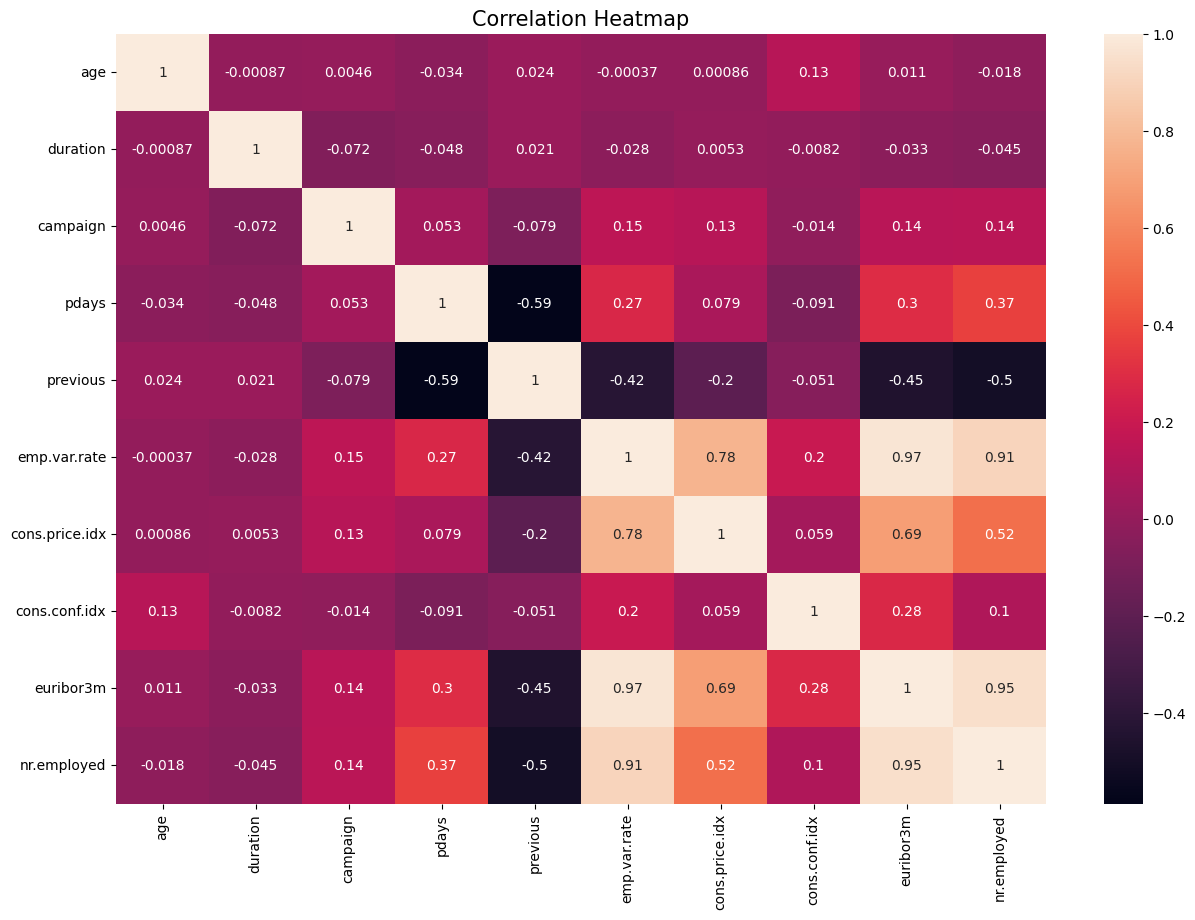

In [9]:
# Heatmap for show the correlation for each features 
fig = plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(bank_market_df.corr(),annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15})

### Exploratory data analysis


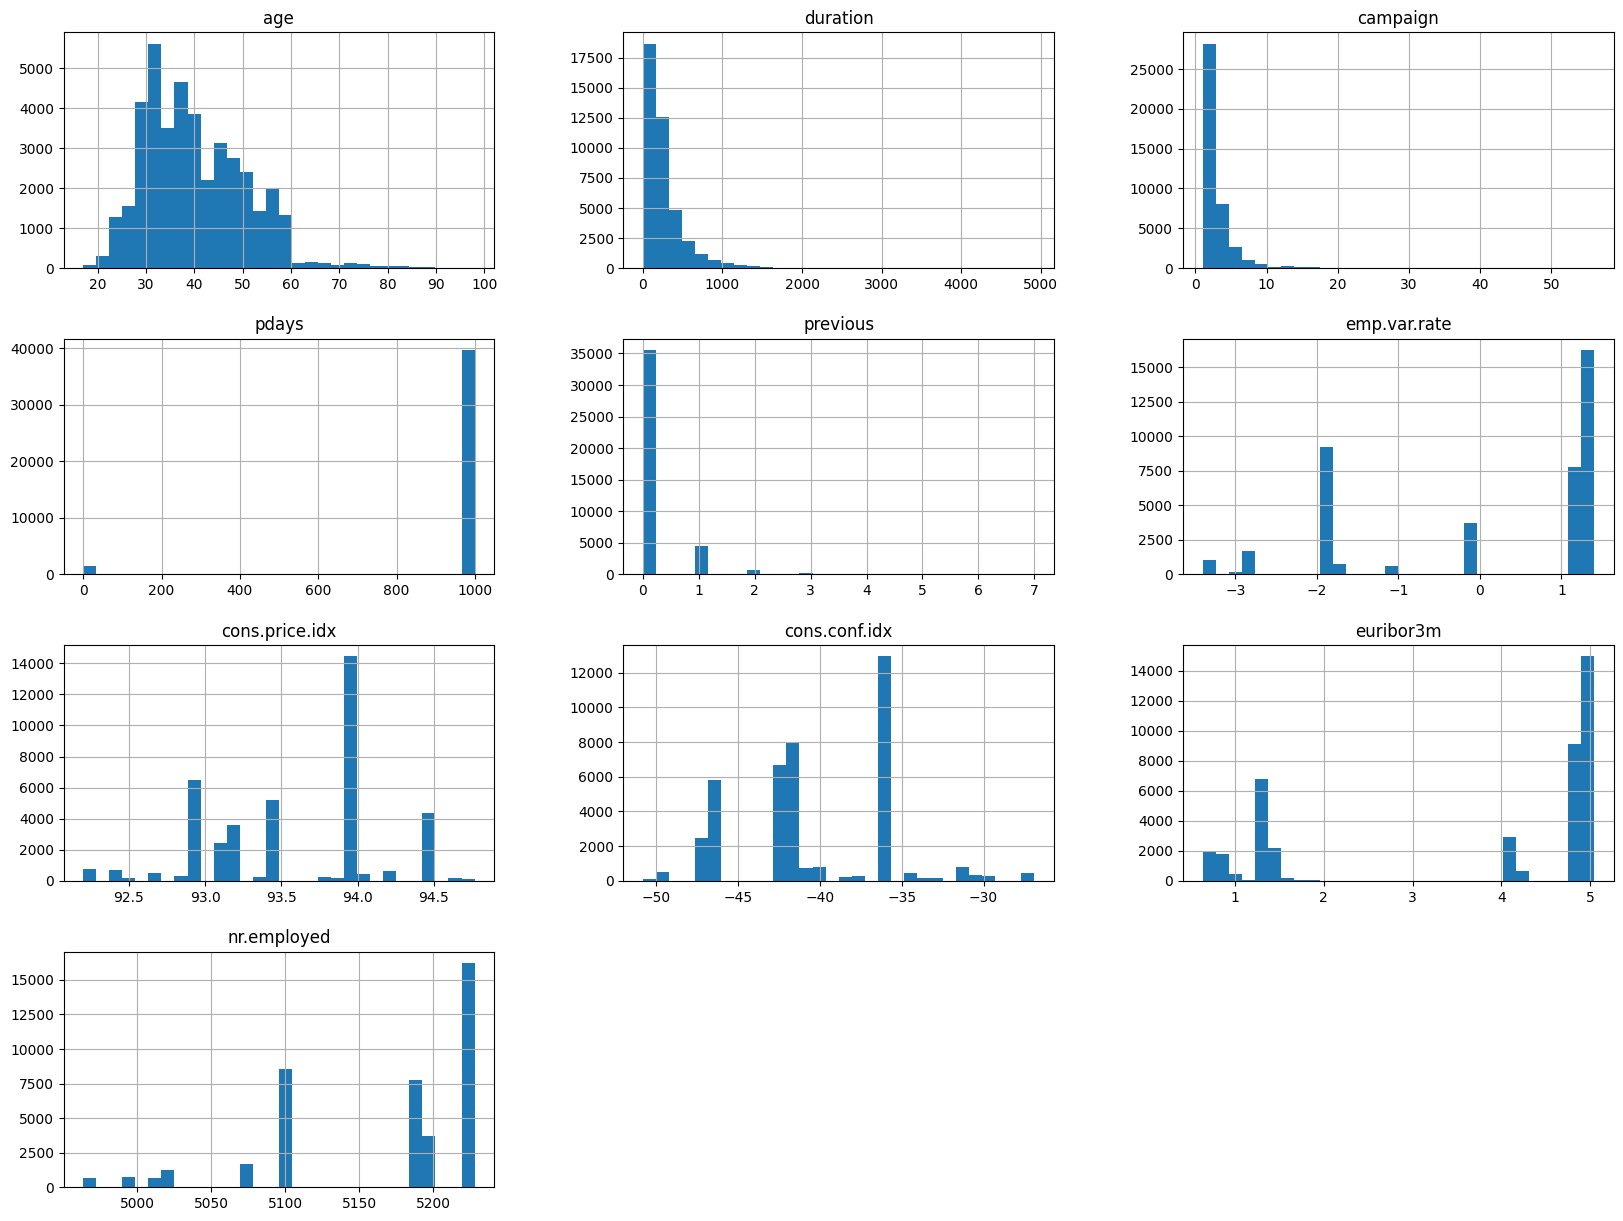

In [10]:
# Visualize distributions of numerical features with histograms

%matplotlib inline

bank_market_df[numeric_col].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

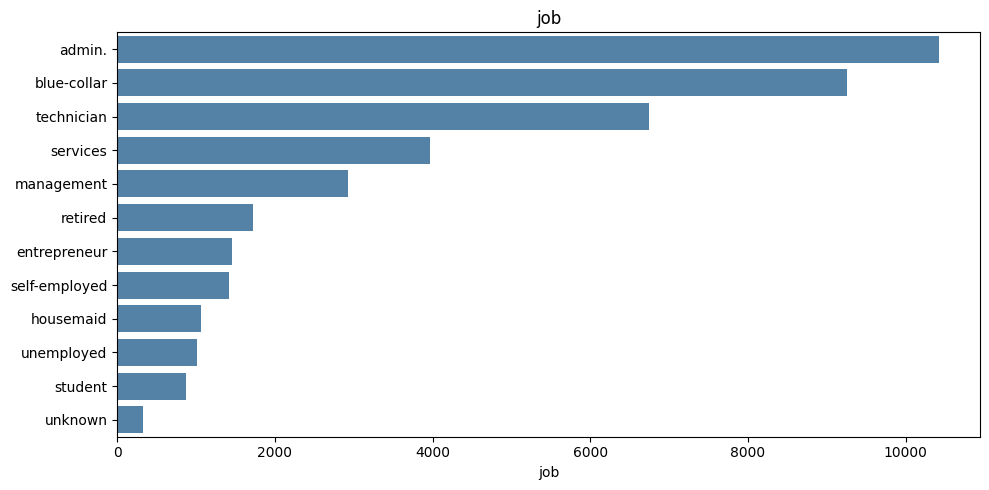

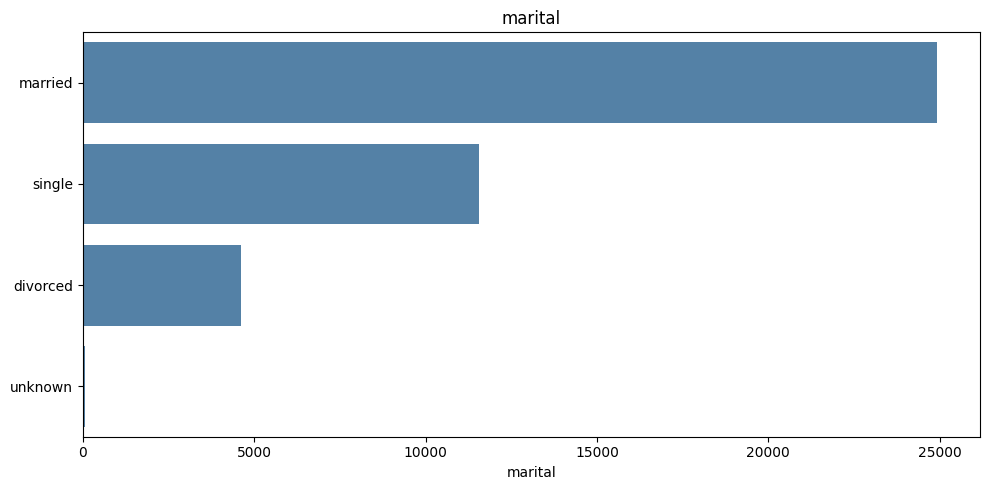

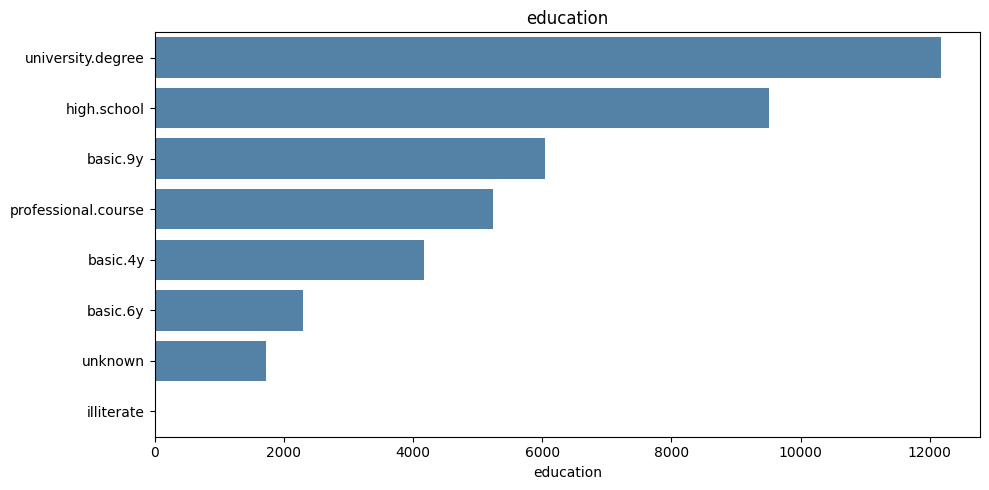

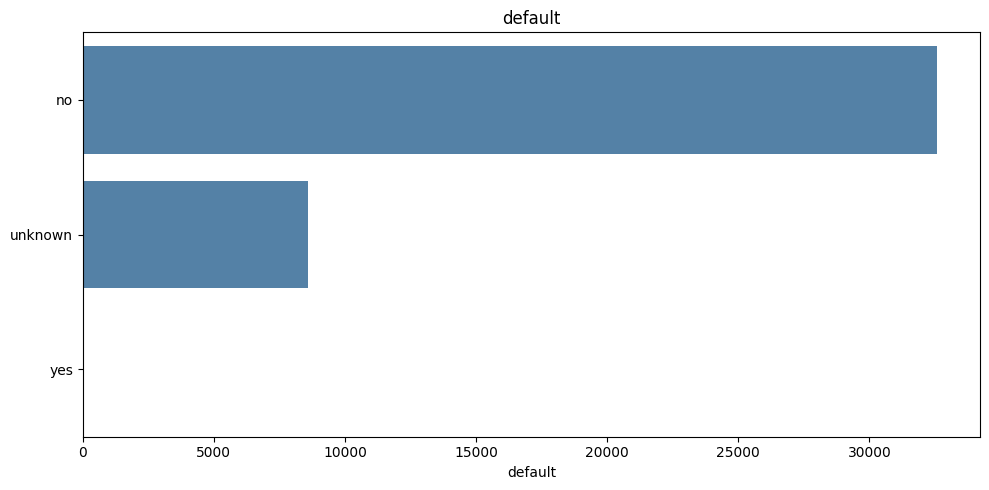

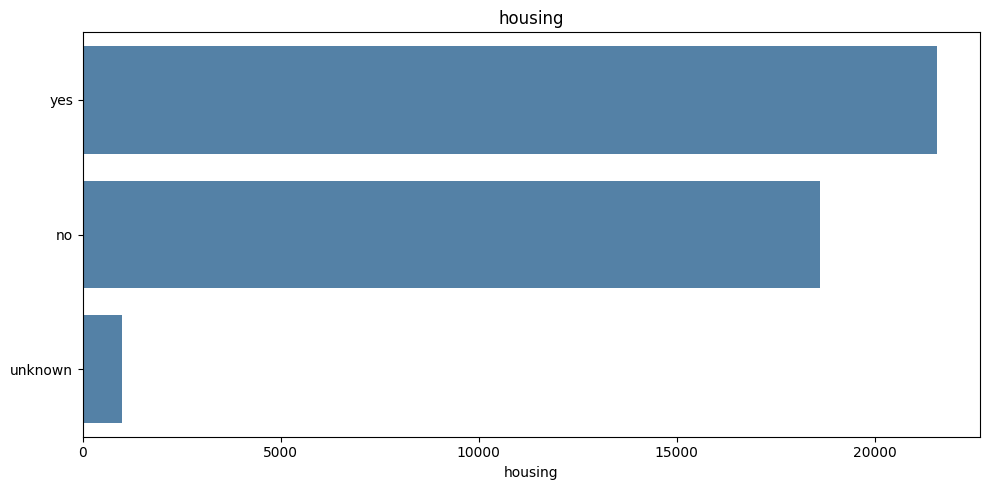

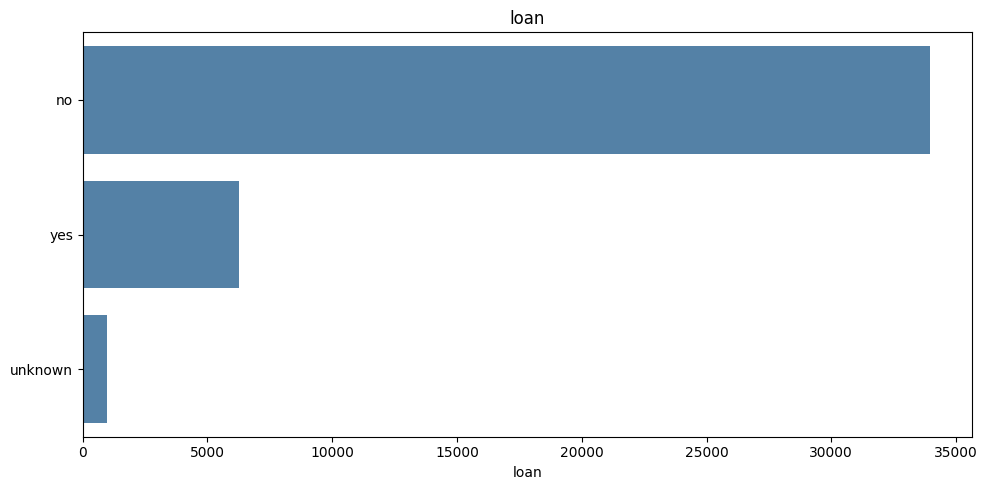

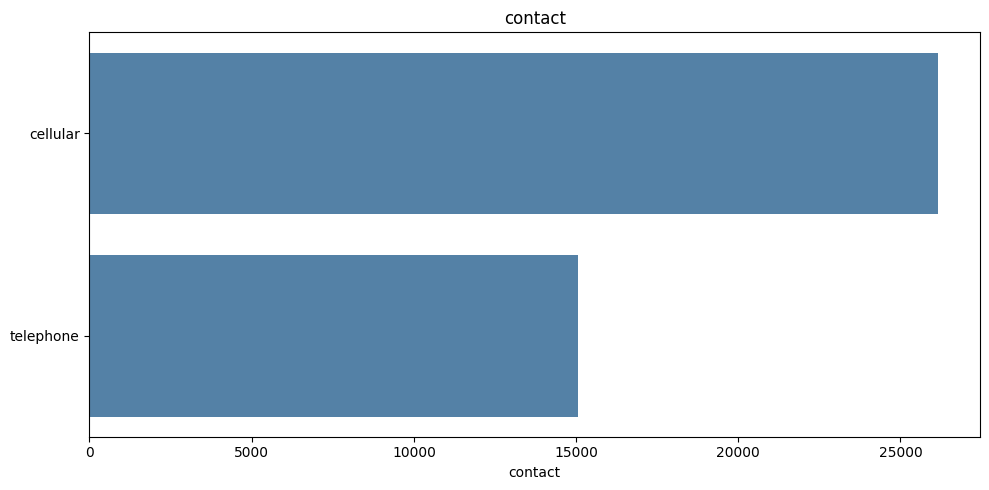

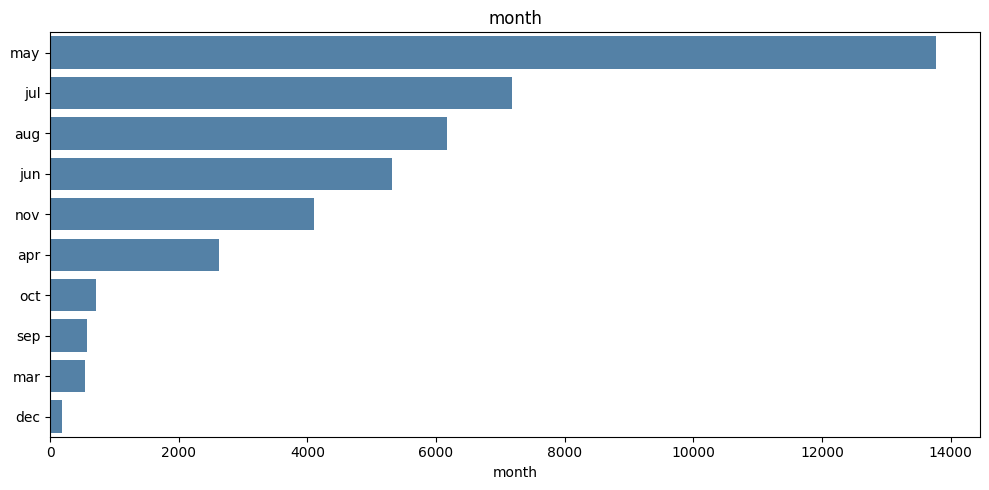

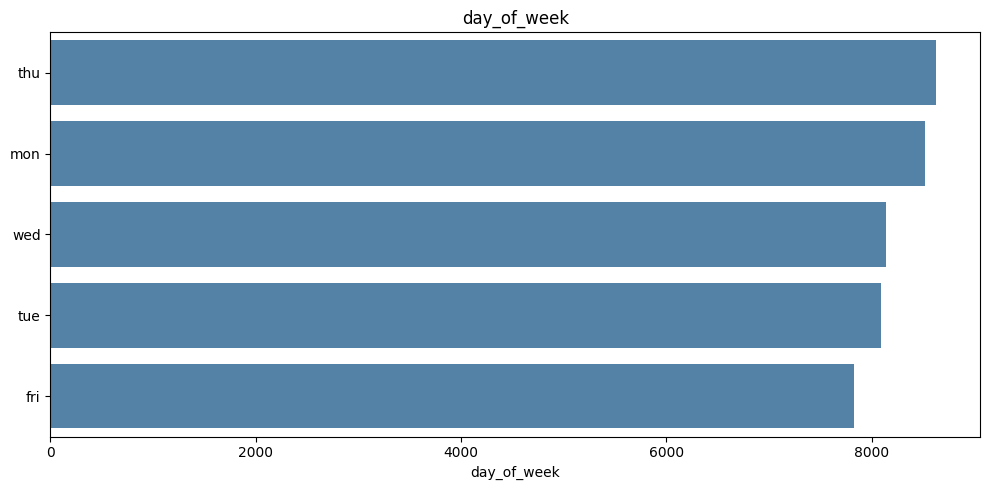

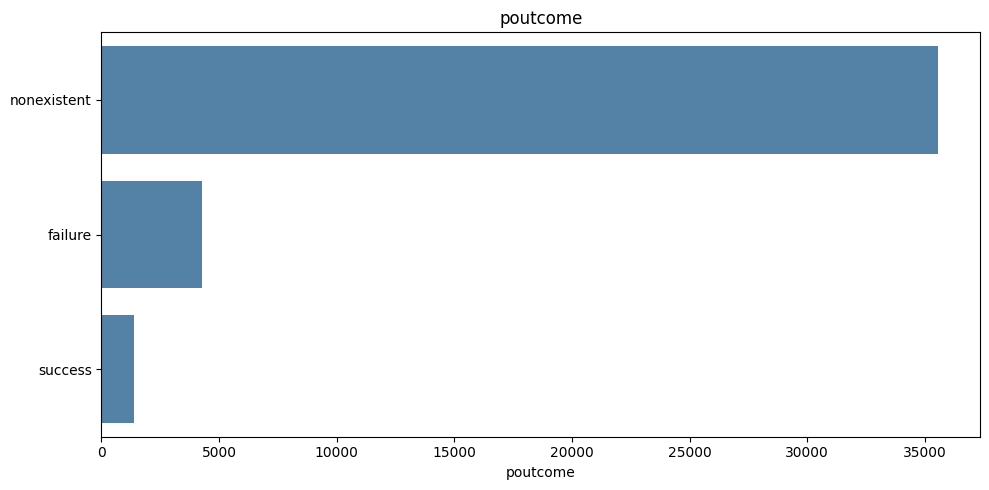

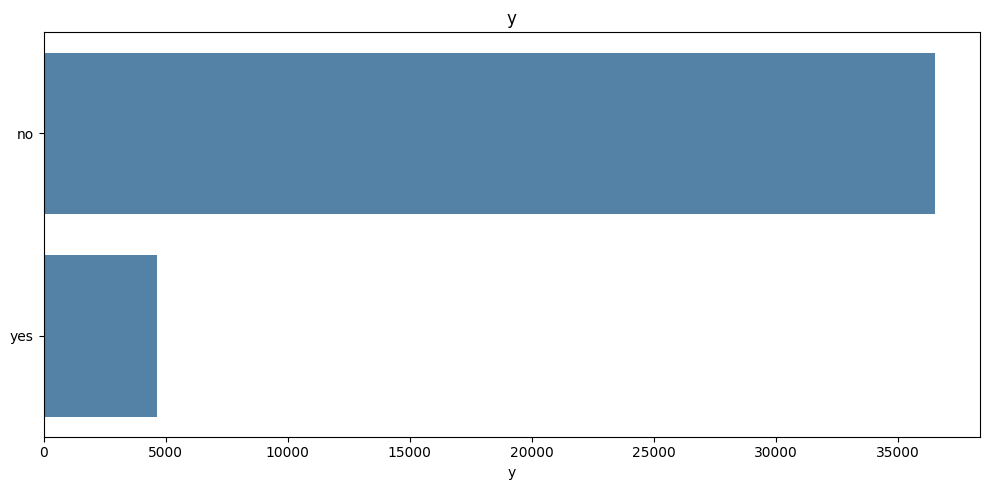

In [11]:
# Visualize a count values of category feature 
for col in category_col:
    plt.figure(figsize=(10,5))    
    sns.barplot(x=bank_market_df[col].value_counts(), y=bank_market_df[col].value_counts().index, data=bank_market_df, color='steelblue')    
    plt.title(col)    
    plt.tight_layout()

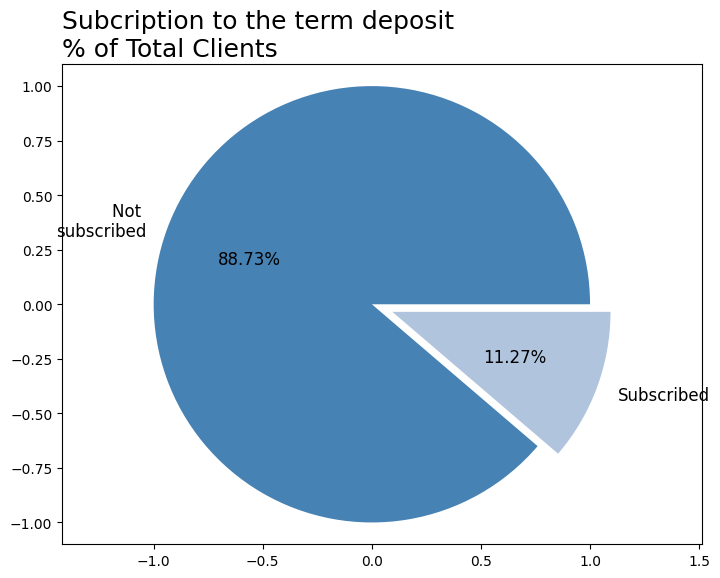

In [12]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(bank_market_df['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12),
       colors = ['steelblue', 'lightsteelblue']) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

In [13]:
# Setup temp of dataframe
temp_df = bank_market_df
temp_df.loc[temp_df["age"] < 30,  'age_group'] = 20
temp_df.loc[(temp_df["age"] >= 30) & (temp_df["age"] <= 39), 'age_group'] = 30
temp_df.loc[(temp_df["age"] >= 40) & (temp_df["age"] <= 49), 'age_group'] = 40
temp_df.loc[(temp_df["age"] >= 50) & (temp_df["age"] <= 59), 'age_group'] = 50
temp_df.loc[temp_df["age"] >= 60, 'age_group'] = 60

In [14]:
age_rate_sub = temp_df[temp_df['y'] == 'yes'][['age_group', 'y']].groupby('age_group').count()
age_rate_nonsub = temp_df[temp_df['y'] == 'no'][['age_group', 'y']].groupby('age_group').count()

age_rate_sub.y = age_rate_sub.y/age_rate_sub.y.sum() * 100
age_rate_nonsub.y = age_rate_nonsub.y/age_rate_nonsub.y.sum() * 100
    
print(age_rate_sub)
print(age_rate_nonsub)

                   y
age_group           
20.0       19.870690
30.0       36.961207
40.0       17.974138
50.0       15.021552
60.0       10.172414
                   y
age_group           
20.0       12.988399
30.0       41.652074
40.0       26.518551
50.0       16.868228
60.0        1.972748


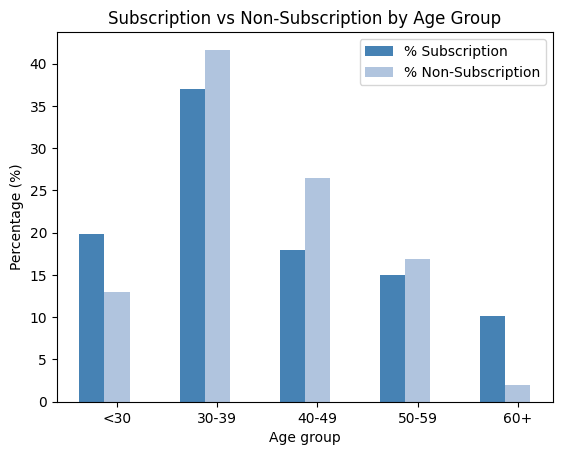

In [15]:
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, age_rate_sub.y, color ='steelblue', width = barWidth,
        label ='% Subscription')
plt.bar(br2, age_rate_nonsub.y, color ='lightsteelblue', width = barWidth,
        label ='% Non-Subscription')
 
# Adding title
plt.title('Subscription vs Non-Subscription by Age Group')
plt.xlabel('Age group')
plt.ylabel('Percentage (%)')
plt.xticks([r + barWidth for r in range(5)],
        ['<30', '30-39', '40-49', '50-59', '60+'])
 
plt.legend()
plt.show()

In [16]:
count_age_response = pd.crosstab(temp_df['y'], temp_df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response = count_age_response.transpose()

age = pd.DataFrame(temp_df['age_group'].value_counts())
age = age.sort_index()
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response['yes']
age.drop('age_group',axis = 1 ,inplace = True)
age

,% Contacted,% Subscription
20.0,13.763718,16.263891
30.0,41.123628,10.125162
40.0,25.555987,7.923238
50.0,16.660192,10.157389
60.0,2.896475,39.564124


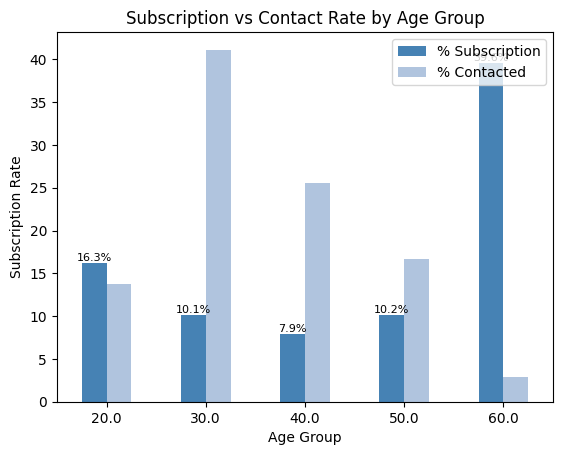

In [17]:

# Setup plot
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('steelblue','lightsteelblue'))
 
# Adding title
plt.title('Subscription vs Contact Rate by Age Group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 0.25, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black',
                      size = 8)
 
plt.legend()
plt.show()

**Visualize the subscription rate by job**

In [18]:
count_job_response = pd.crosstab(temp_df['y'], temp_df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response = count_job_response.transpose()

count_job_response

y,no,yes
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


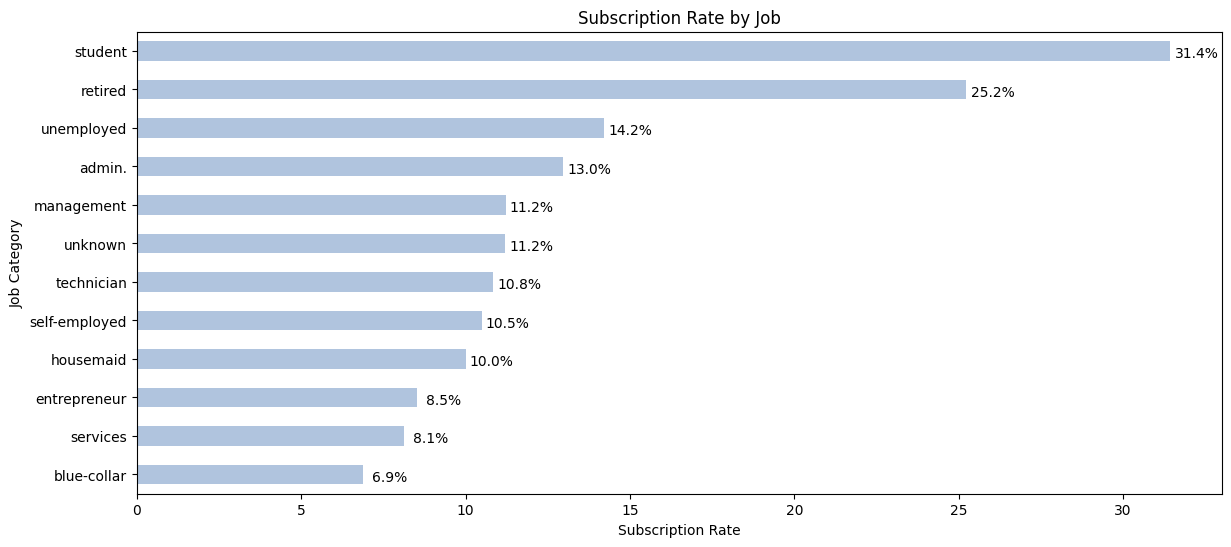

In [19]:
plot_job = count_job_response['yes'].sort_values(ascending = True).plot(kind ='barh',color = 'lightsteelblue', figsize = (14,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [20]:
month_sort = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

count_month_response = pd.crosstab(temp_df['y'], temp_df['month']).apply(lambda x: x/x.sum() * 100)
count_month_response = count_month_response.transpose()
count_month_response = count_month_response.reindex(month_sort)

month = pd.DataFrame(temp_df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response['yes']
month.drop('month',axis = 1,inplace = True)
month = month.reindex(month_sort)

month


,% Contacted,% Subscription
jan,NaN,NaN
feb,NaN,NaN
mar,1.325629,50.549451
apr,6.390211,20.478723
may,33.429640,6.434745
jun,12.911528,10.511470
jul,17.417694,9.046557
aug,14.999514,10.602137
sep,1.383898,44.912281
oct,1.743226,43.871866


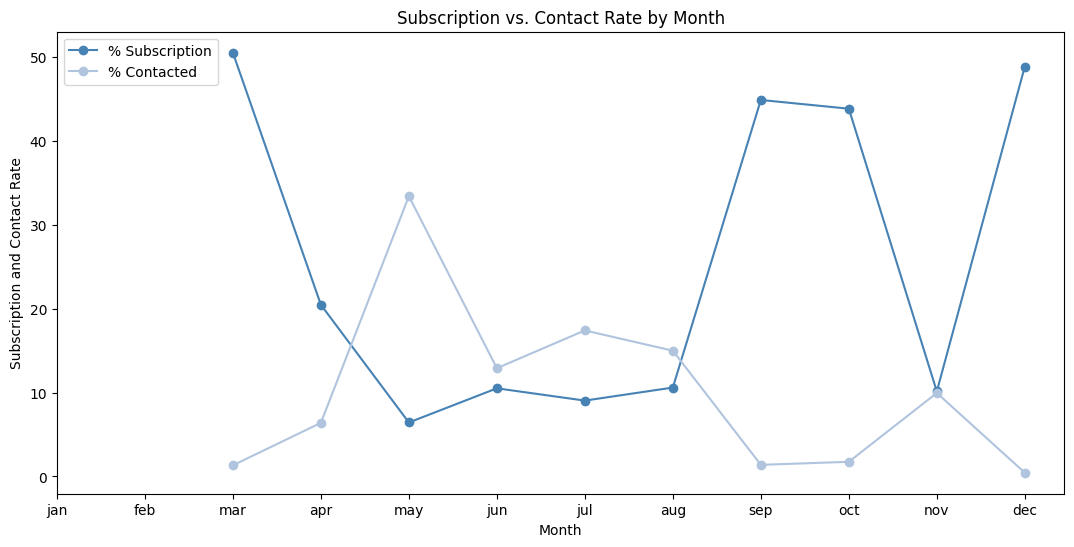

In [21]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          color = ('steelblue','lightsteelblue'),
                                                          figsize = (13,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(0,12,1)
plt.xticks(ticks, month_sort)
plt.show()

In [22]:
bank_market_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0


In [23]:
cluster_data = bank_market_df[bank_market_df["y"] == "no"][["age", "job", "marital", "education", "default", "housing", "loan"]]
cluster_data = cluster_data.reset_index(drop=True)
cluster_data.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [24]:
ce_OHE = ce.OneHotEncoder(cols=["job", "marital", "education", "default", "housing", "loan"])
cluster_data_endcoded = ce_OHE.fit_transform(cluster_data)
cluster_data_endcoded.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,education_8,default_1,default_2,default_3,housing_1,housing_2,housing_3,loan_1,loan_2,loan_3
0,56,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,57,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,37,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,40,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,56,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [25]:
cluster_data_endcoded[['age']] = cluster_data_endcoded[['age']].astype('float64')

In [26]:
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_data_endcoded[['age']])

cluster_data_endcoded_scaled = cluster_data_endcoded.copy()

scaled = pd.DataFrame(scaled, columns =['age'])
cluster_data_endcoded_scaled[['age']] = scaled
cluster_data_endcoded_scaled.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,education_8,default_1,default_2,default_3,housing_1,housing_2,housing_3,loan_1,loan_2,loan_3
0,1.625462,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1.726492,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,-0.294119,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,0.008973,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,1.625462,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [27]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3, random_state = 0)
kmeans.fit(cluster_data_endcoded_scaled) 

kmeans_cluster_labels = kmeans.fit_predict(cluster_data_endcoded_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
cluster_data = bank_market_df[bank_market_df['y'] == 'no'].copy()
cluster_data = cluster_data.reset_index(drop=True)
cluster_data['cluster'] = kmeans_cluster_labels
cluster_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,cluster
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0,2
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0,2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40.0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0,2


In [29]:
pd.options.display.float_format = "{:.0f}".format
summary = cluster_data[['age', 'cluster']]
summary.set_index("cluster", inplace = True)
summary = summary.groupby('cluster').describe().transpose()
summary

cluster       0     1     2
age count 13154 11381 12013
    mean     34    35    51
    std       5     5     6
    min      17    18    38
    25%      30    31    47
    50%      34    34    51
    75%      38    39    55
    max      48    48    95

In [30]:
cluster_data_endcoded.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,education_8,default_1,default_2,default_3,housing_1,housing_2,housing_3,loan_1,loan_2,loan_3
0,56,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,57,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,37,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,40,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,56,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [31]:
X = cluster_data_endcoded
y = pd.DataFrame(kmeans_cluster_labels)

print(X.shape, y.shape)

(36548, 34) (36548, 1)


### Data Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (27411, 34)
Number transactions y_train dataset:  (27411, 1)
Number transactions X_test dataset:  (9137, 34)
Number transactions y_test dataset:  (9137, 1)


### Model Development and Evaluation

In [33]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i],"\n")

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('\n')

Logisitic Regression 

Model performance for Training set
- Accuracy: 0.9992
- F1 score: 0.999197
- Precision: 0.999197
- Recall: 0.999197
Model performance for Test set
- Accuracy: 0.9989
- Fl score: 0.9989
- Precision: 0.9989
- Recall: 0.9989


Decision Tree 

Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
Model performance for Test set
- Accuracy: 0.9976
- Fl score: 0.9976
- Precision: 0.9976
- Recall: 0.9976


Random Forest 

Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
Model performance for Test set
- Accuracy: 0.9980
- Fl score: 0.9980
- Precision: 0.9980
- Recall: 0.9980


K-Nearest Neighbors 

Model performance for Training set
- Accuracy: 0.9979
- F1 score: 0.997920
- Precision: 0.997920
- Recall: 0.997921
Model performance for Test set
- Accuracy: 0.9940
- Fl score: 0.9940
- Precision: 0.9940
- Recall: 0.9940




In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression classifier
lr = LogisticRegression()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and the test set accuracy
print("Best Hyperparameters: ", best_params)
print("Test Set Accuracy: ", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Test Set Accuracy:  0.9982488781875889


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
# Print the best hyperparameters and the test set accuracy
print("Best Hyperparameters: ", best_params)
print("Test Set Accuracy: ", accuracy)

Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Test Set Accuracy:  0.9982488781875889
